How does unemployement have an effect on retail sales?

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Read in Data frame
datapath = '/content/drive/MyDrive/IntroToDataScience-SamanthaMathieu/Project1/Project1: Math 3439/data/'
df_sales = pd.read_csv(datapath+'sales.csv')
df_stores = pd.read_csv(datapath+'stores.csv')
df_store_features = pd.read_csv(datapath+'store_features.csv')

In [ ]:
#merge datasets
#df_sales.head()
#df_store_features.head()
#df_sales['Date'] = pd.to_datetime(df_sales['Date'])
#df_store_features['Date'] = pd.to_datetime(df_store_features['Date'])
#mergeddf = pd.merge(df_sales, df_store_features, on=['Store', 'Date', 'IsHoliday'])
#mergeddf.head()

In [ ]:
#converting dates in sales and store features to datetime
df_store_features['Date'] = pd.to_datetime(df_store_features['Date'])
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
#removing dept from sales and adjusting sales amounts, based on the avg amount for that date
df_sales = df_sales.groupby(['Store', 'Date', 'IsHoliday']).agg({'Weekly_Sales': np.sum}).reset_index()
df_sales_mean = df_sales.groupby('Date').agg({'Weekly_Sales': 'mean'}).reset_index()
df_sales_mean.columns = ['Date', 'Sales_Avg_For_Date']
df_sales = pd.merge(df_sales, df_sales_mean, on='Date')
df_sales['Weekly_Sales_Adjusted'] = df_sales['Weekly_Sales'] - df_sales['Sales_Avg_For_Date']
df_sales.head()

,Store,Date,IsHoliday,Weekly_Sales,Sales_Avg_For_Date,Weekly_Sales_Adjusted
0,1,2010-01-10,False,1453329.50,938663.908222,514665.591778
1,2,2010-01-10,False,1827440.43,938663.908222,888776.521778
2,3,2010-01-10,False,358784.10,938663.908222,-579879.808222
3,4,2010-01-10,False,1842821.02,938663.908222,904157.111778
4,5,2010-01-10,False,283178.12,938663.908222,-655485.788222


In [ ]:
#merging dataframes
df_merged = pd.merge(df_sales, df_stores, on='Store')
df_merged.head()
df_merged = pd.merge(df_merged, df_store_features, on=['Store', 'Date', 'IsHoliday'])
df_merged.head()
df_merged.shape

(2160, 17)

In [ ]:
#writing merged dataframe to csv
df_merged.to_csv(datapath + 'merged_datasets_adj.csv', encoding='utf-8', index=False)

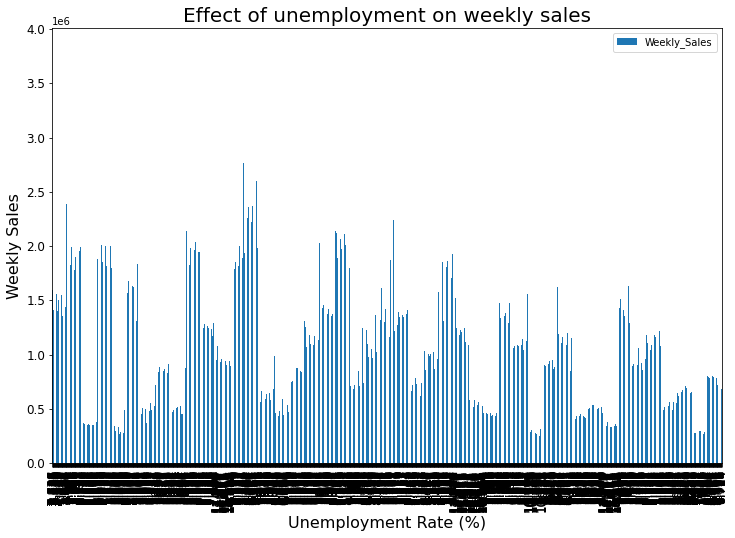

In [ ]:
#make a scatter plot for overall weekly sales (not used b/c messy)
ax1 = df_merged.plot(x='Unemployment', y='Weekly_Sales', figsize =(12,8), kind='bar')
ax1.set_xlabel('Unemployment Rate (%)', fontsize=16)
ax1.set_ylabel('Weekly Sales', fontsize=16)
ax1.set_title('Effect of unemployment on weekly sales', fontsize = 20)
ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)

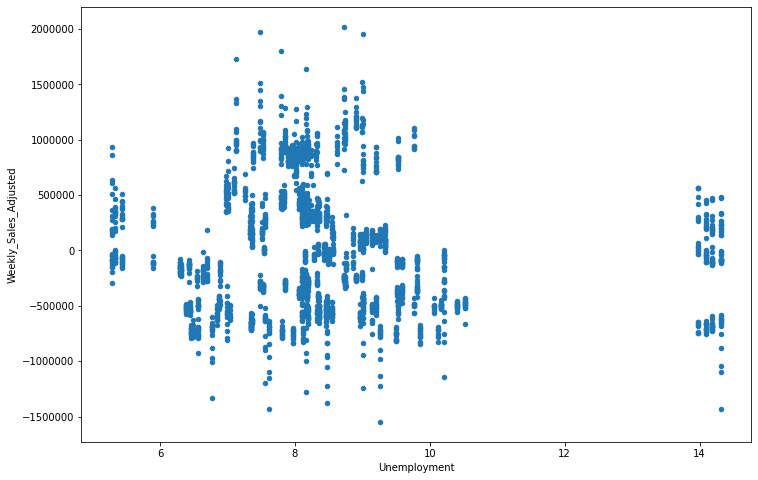

In [ ]:
#scatter plot with adjusted weekly sales
df_merged.plot(x='Unemployment', y='Weekly_Sales_Adjusted', kind='scatter', figsize=(12, 8))
plt.ticklabel_format(axis='y', style='plain')

In [ ]:
#Correlation
df_merged.corr()**2

,Store,IsHoliday,Weekly_Sales,Sales_Avg_For_Date,Weekly_Sales_Adjusted,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000e+00,3.063939e-32,0.107423,1.308356e-29,1.145704e-01,5.966776e-02,0.000122,0.021623,NaN,NaN,NaN,NaN,NaN,0.044106,5.339914e-02
IsHoliday,3.063939e-32,1.000000e+00,0.000744,1.193325e-02,1.049913e-32,8.636914e-33,0.043281,0.001541,NaN,NaN,NaN,NaN,NaN,0.000002,1.256916e-06
Weekly_Sales,1.074230e-01,7.444449e-04,1.000000,6.238409e-02,9.376159e-01,6.290140e-01,0.010481,0.016371,NaN,NaN,NaN,NaN,NaN,0.006668,7.175463e-03
Sales_Avg_For_Date,1.308356e-29,1.193325e-02,0.062384,1.000000e+00,3.007116e-30,1.484274e-30,0.059959,0.048889,NaN,NaN,NaN,NaN,NaN,0.000002,7.227412e-07
Weekly_Sales_Adjusted,1.145704e-01,1.049913e-32,0.937616,3.007116e-30,1.000000e+00,6.708653e-01,0.001812,0.005641,NaN,NaN,NaN,NaN,NaN,0.007178,7.614562e-03
Size,5.966776e-02,8.636914e-33,0.629014,1.484274e-30,6.708653e-01,1.000000e+00,0.009012,0.000033,NaN,NaN,NaN,NaN,NaN,0.000101,1.223820e-02
Temperature,1.219153e-04,4.328091e-02,0.010481,5.995925e-02,1.811862e-03,9.011928e-03,1.000000,0.023778,NaN,NaN,NaN,NaN,NaN,0.022124,2.536297e-02
Fuel_Price,2.162324e-02,1.540877e-03,0.016371,4.888895e-02,5.640518e-03,3.272073e-05,0.023778,1.000000,NaN,NaN,NaN,NaN,NaN,0.366473,1.620003e-01
MarkDown1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#see what columns are missing data
df_merged.isna().sum()

Store                       0
Date                        0
IsHoliday                   0
Weekly_Sales                0
Sales_Avg_For_Date          0
Weekly_Sales_Adjusted       0
Type                        0
Size                        0
Temperature                 0
Fuel_Price                  0
MarkDown1                2160
MarkDown2                2160
MarkDown3                2160
MarkDown4                2160
MarkDown5                2160
CPI                         0
Unemployment                0
dtype: int64

In [ ]:
#look at merged dataframe
df_merged.head()

,Store,Date,IsHoliday,Weekly_Sales,Sales_Avg_For_Date,Weekly_Sales_Adjusted,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-01-10,False,1453329.50,9.386639e+05,514665.591778,A,151315,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838
1,1,2010-02-04,False,1594968.28,1.120530e+06,474438.696444,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808
2,1,2010-02-07,False,1492418.14,1.087055e+06,405362.928889,A,151315,80.91,2.669,NaN,NaN,NaN,NaN,NaN,211.223533,7.787
3,1,2010-02-19,False,1611968.17,1.072822e+06,539146.086000,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
4,1,2010-02-26,False,1409727.59,9.770794e+05,432648.231556,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106


In [ ]:
#see avg weekly sales adjusted
df_merged[df_merged['binned'] == df_merged['binned'].unique()[0]]['Weekly_Sales_Adjusted'].mean()

223154.62625292738

In [ ]:
#take mean for each unemployment (bucket them) perhaps make a line graph
#makes a list to use so that way you don't need to type out every number to 14, if you double the 15 then you get by 0.5
bins = np.linspace(5,14, num = 10)
bins
#makes bins by the list to 14
df_merged['binned'] = pd.cut(df_merged['Unemployment'], bins)
df_merged.head()
#groupby unemployment/binned
unemploymentdf = df_merged.groupby('binned').agg({'Weekly_Sales_Adjusted':np.median})
unemploymentdf = unemploymentdf.reset_index()

In [ ]:
#look at new dataframe
unemploymentdf.head()

,binned,Weekly_Sales_Adjusted
0,"(5.0, 6.0]",72221.500000
1,"(6.0, 7.0]",-474686.368222
2,"(7.0, 8.0]",308039.436222
3,"(8.0, 9.0]",8573.755333
4,"(9.0, 10.0]",-107684.172000


In [ ]:
#look at columns
unemploymentdf.columns

Index(['binned', 'Weekly_Sales_Adjusted'], dtype='object')

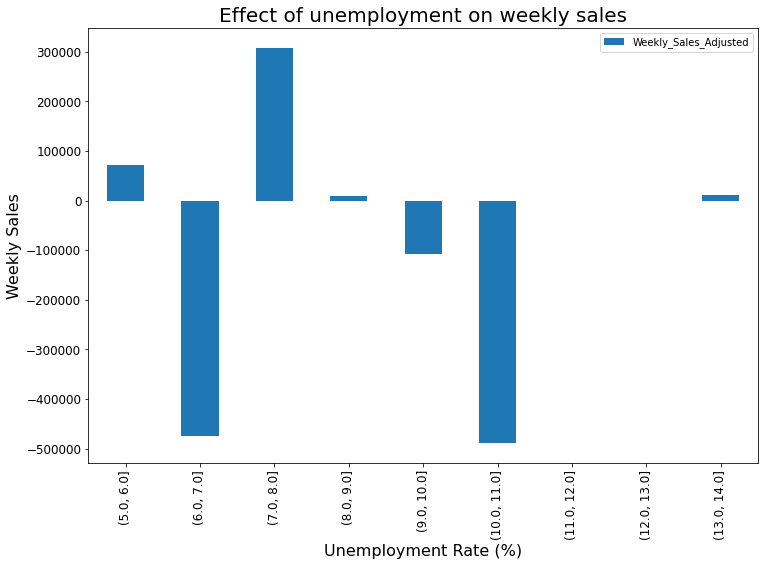

In [ ]:
#Make bar chart
unemploymentdf['binned_str'] = unemploymentdf['binned'].astype(str)
ax = unemploymentdf.plot(x='binned_str', y='Weekly_Sales_Adjusted', figsize =(12,8), kind='bar')
ax.set_xlabel('Unemployment Rate (%)', fontsize=16)
ax.set_ylabel('Weekly Sales', fontsize=16)
ax.set_title('Effect of unemployment on weekly sales', fontsize = 20)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

In [ ]:
#look at max, min
unemploymentdf['binned_str'] = unemploymentdf['binned'].astype(str)
ax = unemploymentdf.plot(x='CPI', y='binned_str', figsize =(12,8), kind='bar')
ax.set_xlabel('Unemployment Rate (%)', fontsize=16)
ax.set_ylabel('Weekly Sales', fontsize=16)
ax.set_title('Effect of unemployment on weekly sales', fontsize = 20)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

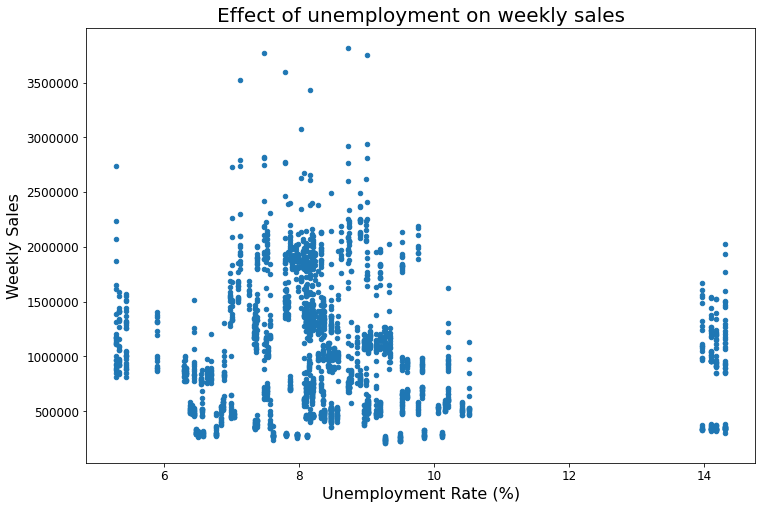

In [ ]:
#Make a scatterplot using overall sales not adjusted
unemploymentdf['binned_str'] = unemploymentdf['binned'].astype(str)
ax1 = df_merged.plot(x='Unemployment', y='Weekly_Sales', figsize =(12,8), kind='scatter')
ax1.set_xlabel('Unemployment Rate (%)', fontsize=16)
ax1.set_ylabel('Weekly Sales', fontsize=16)
ax1.set_title('Effect of unemployment on weekly sales', fontsize = 20)
ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
plt.ticklabel_format(axis='y', style='plain') #gets rid of scientific notation

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


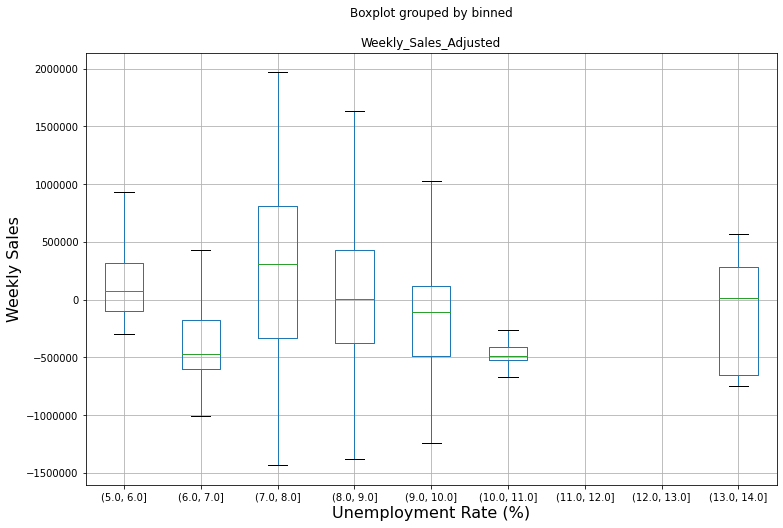

In [ ]:
#Make boxplot
ax2 = df_merged.boxplot(column='Weekly_Sales_Adjusted', by='binned',
                  figsize =(12,8),showfliers= False)
ax2.set_xlabel('Unemployment Rate (%)', fontsize=16)
ax2.set_ylabel('Weekly Sales', fontsize=16)
plt.ticklabel_format(axis='y', style='plain')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


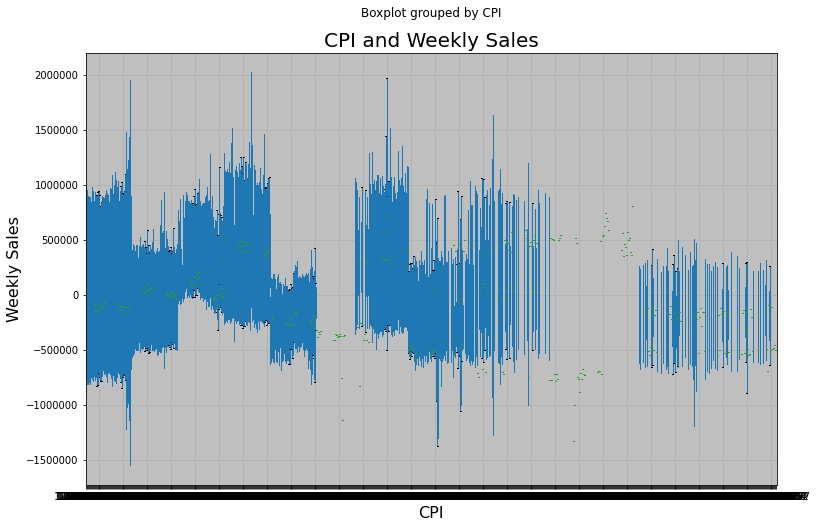

In [ ]:
#Look at CPI and Weekly Sales
ax2 = df_merged.boxplot(column='Weekly_Sales_Adjusted', by='CPI',
                  figsize =(12,8),showfliers= False)
ax2.set_xlabel('CPI', fontsize=16)
ax2.set_ylabel('Weekly Sales', fontsize=16)
ax2.set_title('CPI and Weekly Sales', fontsize = 20)
plt.ticklabel_format(axis='y', style='plain')

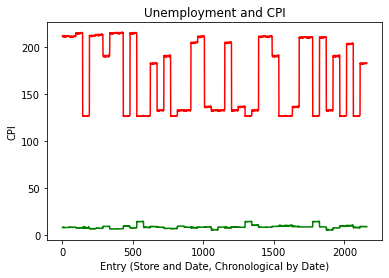

In [ ]:
#Another plot looking at unemployment and CPI
plt.plot(df_merged['CPI'], color='red')
plt.ylabel('CPI')
plt.xlabel('Entry (Store and Date, Chronological by Date)')
#plt.title('Total and Avg Weekly Sales')

plt.plot(df_merged['Unemployment'], color='green')
plt.title('Unemployment and CPI')

plt.ticklabel_format(axis='y', style='plain')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


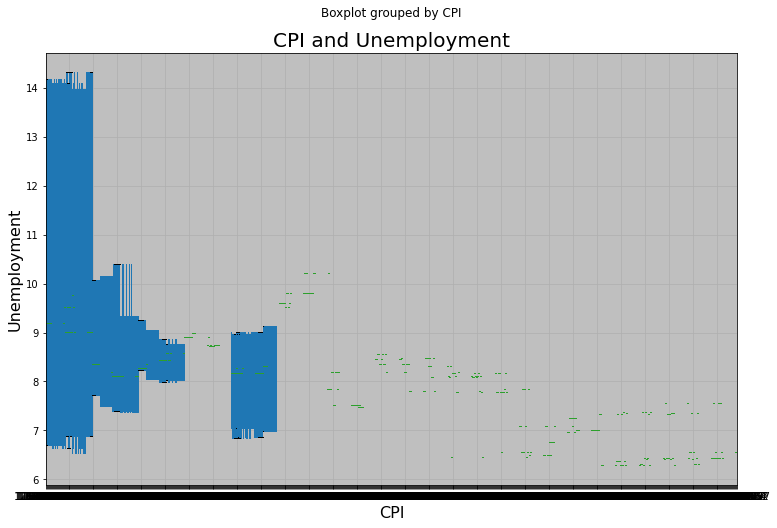

In [ ]:
#A different plot of CPI and unemployment
ax2 = df_merged.boxplot(column='Unemployment', by='CPI',
                  figsize =(12,8),showfliers= False)
ax2.set_xlabel('CPI', fontsize=16)
ax2.set_ylabel('Unemployment', fontsize=16)
ax2.set_title('CPI and Unemployment', fontsize = 20)
plt.ticklabel_format(axis='y', style='plain')

In [ ]:
#how many points are in each bin
df_merged.groupby('binned').agg({'Weekly_Sales_Adjusted':np.size})

,Weekly_Sales_Adjusted
binned,
"(5.0, 6.0]",96.0
"(6.0, 7.0]",245.0
"(7.0, 8.0]",427.0
"(8.0, 9.0]",821.0
"(9.0, 10.0]",343.0
"(10.0, 11.0]",84.0
"(11.0, 12.0]",NaN
"(12.0, 13.0]",NaN
"(13.0, 14.0]",24.0


In [ ]:
#See if markdowns impact weekly sales as that relates to unemployment
merged_trimmed = df_merged.dropna()
merged_trimmed.head()
#mergeddf.plot(x='MarkDown5', y='Weekly_Sales', kind='scatter', figsize=(12, 8))

,Store,Date,IsHoliday,Weekly_Sales,Sales_Avg_For_Date,Weekly_Sales_Adjusted,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,binned


In [ ]:
#See how much is missing from markdowns
for col in df_merged.columns:
  num_missing = df_merged[col].isna().sum()
  pct_missing = num_missing / df_merged.shape[0]
  print(f'{col}: {num_missing} ({100 * pct_missing}%)')

Store: 0 (0.0%)
Date: 0 (0.0%)
IsHoliday: 0 (0.0%)
Weekly_Sales: 0 (0.0%)
Sales_Avg_For_Date: 0 (0.0%)
Weekly_Sales_Adjusted: 0 (0.0%)
Type: 0 (0.0%)
Size: 0 (0.0%)
Temperature: 0 (0.0%)
Fuel_Price: 0 (0.0%)
MarkDown1: 2160 (100.0%)
MarkDown2: 2160 (100.0%)
MarkDown3: 2160 (100.0%)
MarkDown4: 2160 (100.0%)
MarkDown5: 2160 (100.0%)
CPI: 0 (0.0%)
Unemployment: 0 (0.0%)
binned: 120 (5.555555555555555%)


In [ ]:
#Take out outlier cluster and see how that impacts correlation
df_merged.head()
Unemployment_No_Outliers = df_merged[df_merged['binned'].between(df_merged['binned'].quantile(.05), 
                                     df_merged['binned'].quantile(.95))]
print(len(df_merged.index) - len(Unemployment_No_Outliers.index))

240


In [ ]:
#See new correlation between Unemployment and adjusted weekly sales without outliers
Unemployment_No_Outliers.corr()**2

,Store,IsHoliday,Weekly_Sales,Sales_Avg_For_Date,Weekly_Sales_Adjusted,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000e+00,9.068973e-33,0.102992,1.271876e-29,1.094542e-01,6.575402e-02,0.000004,0.016954,NaN,NaN,NaN,NaN,NaN,0.032543,0.234610
IsHoliday,9.068973e-33,1.000000e+00,0.000684,1.193325e-02,1.402677e-07,1.311996e-32,0.042549,0.001500,NaN,NaN,NaN,NaN,NaN,0.000002,0.000002
Weekly_Sales,1.029916e-01,6.840809e-04,1.000000,5.904324e-02,9.410708e-01,6.440192e-01,0.007289,0.027924,NaN,NaN,NaN,NaN,NaN,0.010710,0.000592
Sales_Avg_For_Date,1.271876e-29,1.193325e-02,0.059043,1.000000e+00,5.856200e-08,3.692913e-30,0.058789,0.050221,NaN,NaN,NaN,NaN,NaN,0.000002,0.000007
Weekly_Sales_Adjusted,1.094542e-01,1.402677e-07,0.941071,5.856200e-08,1.000000e+00,6.844301e-01,0.000747,0.013499,NaN,NaN,NaN,NaN,NaN,0.011461,0.000597
Size,6.575402e-02,1.311996e-32,0.644019,3.692913e-30,6.844301e-01,1.000000e+00,0.009408,0.000686,NaN,NaN,NaN,NaN,NaN,0.000540,0.021930
Temperature,4.206359e-06,4.254920e-02,0.007289,5.878927e-02,7.473800e-04,9.407843e-03,1.000000,0.049397,NaN,NaN,NaN,NaN,NaN,0.036002,0.000009
Fuel_Price,1.695400e-02,1.500318e-03,0.027924,5.022087e-02,1.349944e-02,6.855729e-04,0.049397,1.000000,NaN,NaN,NaN,NaN,NaN,0.324312,0.067095
MarkDown1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-24-e7df0e33ed82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_No_Outliers['Log Weekly Sales'] = np.log(Unemployment_No_Outliers['Weekly_Sales_Adjusted'])


,Store,IsHoliday,Weekly_Sales,Sales_Avg_For_Date,Weekly_Sales_Adjusted,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Log Weekly Sales
Store,1.000000e+00,9.068973e-33,0.102992,1.271876e-29,1.094542e-01,6.575402e-02,0.000004,0.016954,NaN,NaN,NaN,NaN,NaN,0.032543,0.234610,0.263375
IsHoliday,9.068973e-33,1.000000e+00,0.000684,1.193325e-02,1.402677e-07,1.311996e-32,0.042549,0.001500,NaN,NaN,NaN,NaN,NaN,0.000002,0.000002,0.000004
Weekly_Sales,1.029916e-01,6.840809e-04,1.000000,5.904324e-02,9.410708e-01,6.440192e-01,0.007289,0.027924,NaN,NaN,NaN,NaN,NaN,0.010710,0.000592,0.616861
Sales_Avg_For_Date,1.271876e-29,1.193325e-02,0.059043,1.000000e+00,5.856200e-08,3.692913e-30,0.058789,0.050221,NaN,NaN,NaN,NaN,NaN,0.000002,0.000007,0.016958
Weekly_Sales_Adjusted,1.094542e-01,1.402677e-07,0.941071,5.856200e-08,1.000000e+00,6.844301e-01,0.000747,0.013499,NaN,NaN,NaN,NaN,NaN,0.011461,0.000597,0.724632
Size,6.575402e-02,1.311996e-32,0.644019,3.692913e-30,6.844301e-01,1.000000e+00,0.009408,0.000686,NaN,NaN,NaN,NaN,NaN,0.000540,0.021930,0.129593
Temperature,4.206359e-06,4.254920e-02,0.007289,5.878927e-02,7.473800e-04,9.407843e-03,1.000000,0.049397,NaN,NaN,NaN,NaN,NaN,0.036002,0.000009,0.012117
Fuel_Price,1.695400e-02,1.500318e-03,0.027924,5.022087e-02,1.349944e-02,6.855729e-04,0.049397,1.000000,NaN,NaN,NaN,NaN,NaN,0.324312,0.067095,0.024845
MarkDown1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


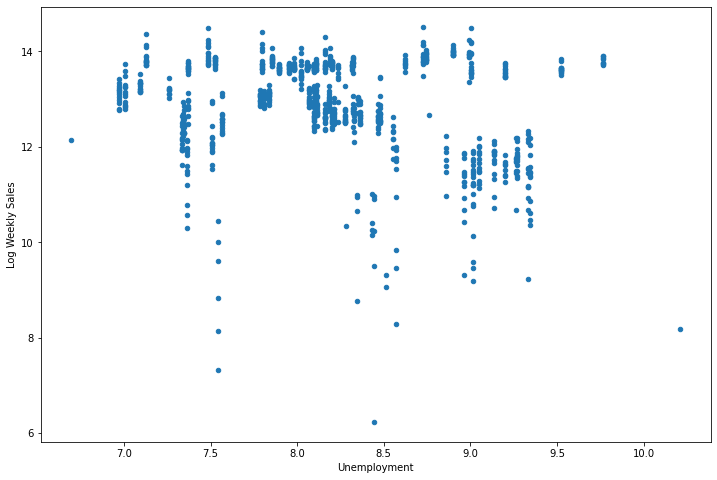

In [ ]:
#made scatter plot but not used
Unemployment_No_Outliers['Log Weekly Sales'] = np.log(Unemployment_No_Outliers['Weekly_Sales_Adjusted'])
ax = Unemployment_No_Outliers.plot(x='Unemployment', y='Log Weekly Sales', figsize =(12,8), kind='scatter')
Unemployment_No_Outliers.corr()**2

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


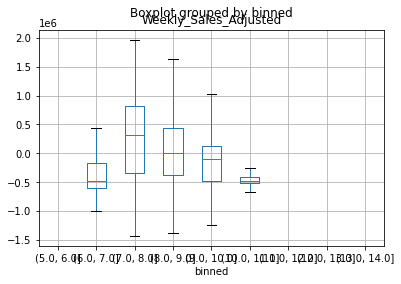

In [ ]:
#Playing with graphing but not used
Unemployment_No_Outliers.boxplot(column='Weekly_Sales_Adjusted', by='binned', showfliers= False)

<ipython-input-42-3a589e869ed8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_No_Outliers['binned_str'] = Unemployment_No_Outliers['binned'].astype(str)


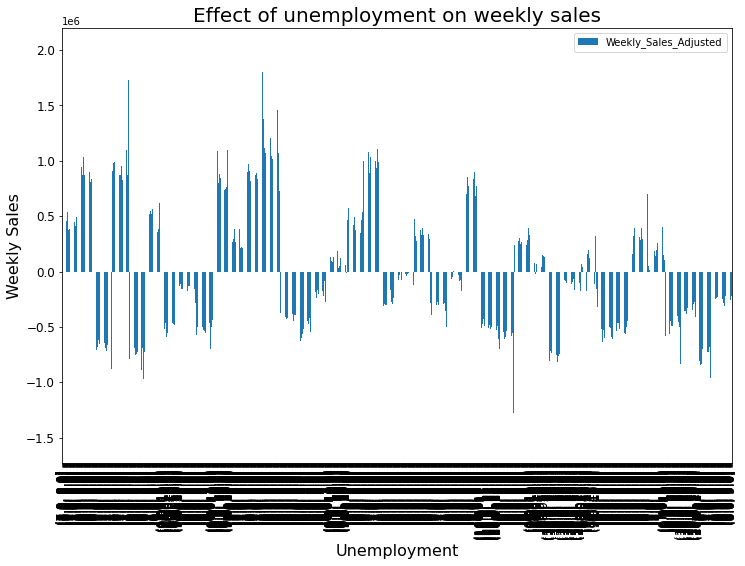

In [ ]:
#Playing with graphing but not used
Unemployment_No_Outliers['binned_str'] = Unemployment_No_Outliers['binned'].astype(str)
ax = Unemployment_No_Outliers.plot(x='binned_str', y='Weekly_Sales_Adjusted', figsize =(12,8), kind='bar')
ax.set_xlabel('Unemployment', fontsize=16)
ax.set_ylabel('Weekly Sales', fontsize=16)
ax.set_title('Effect of unemployment on weekly sales', fontsize = 20)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)